Back to the main [Index](../index.ipynb)

### Generate different wave forms
Example for how to create different wave form functions in tellurium.

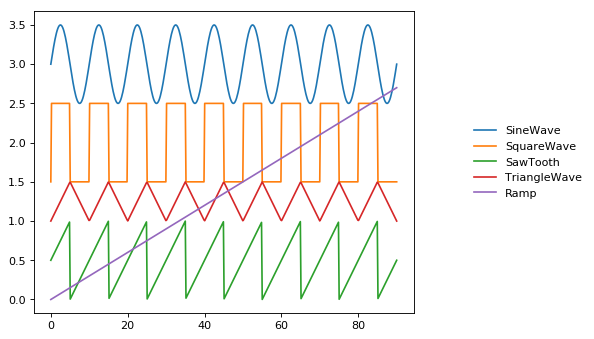

In [2]:
from __future__ import print_function
import tellurium as te
te.setDefaultPlottingEngine("matplotlib")
%matplotlib inline
from roadrunner import Config

# We do not want CONSERVED MOIETIES set to true in this case
Config.setValue(Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, False) 

# Generating different waveforms
model = '''
  model waveforms()
     # All waves have the following amplitude and period
     amplitude = 1
     period = 10

     # These events set the 'UpDown' variable to 1 or 0 according to the period.
     UpDown=0
     at sin(2*pi*time/period) >  0, t0=false: UpDown = 1
     at sin(2*pi*time/period) <= 0, t0=false: UpDown = 0

     # Simple Sine wave with y displaced by 3
     SineWave := amplitude/2*sin(2*pi*time/period) + 3

     # Square wave with y displaced by 1.5
     SquareWave := amplitude*UpDown + 1.5

     # Triangle waveform with given period and y displaced by 1
     TriangleWave = 1
     TriangleWave' = amplitude*2*(UpDown - 0.5)/period

     # Saw tooth wave form with given period
     SawTooth = amplitude/2
     SawTooth' = amplitude/period
     at UpDown==0: SawTooth = 0

     # Simple ramp
     Ramp := 0.03*time
  end
'''

r = te.loada(model)

r.timeCourseSelections = ['time', 'SineWave', 'SquareWave', 'SawTooth', 'TriangleWave', 'Ramp']
result = r.simulate (0, 90, 500)
r.plot(result)

# reset to default config
Config.setValue(Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, False) 